### Tensorflow

-GPUs are de facto standard hardware for accelerating deep learning with neural network.

-Major DL softwares support only CPU and NVIDIA GPUs (cuDNN based).

-TF runs models on a range of platforms
e.g. mobile devices, distributed systems

-Tensor is a generalization of vectors and matrices (potentially higher dimensions, n-dimensional array of base data types)

-Tensors flow through the graph
(edge: tensor, data, node:operation)

-Graphs can be easily distributed

-(Version1) Sessions allow parts of the graph to be executed. It allocates memory and resources and handle operations.


##### TF 2.X architecture

-Estimator, Canned Estimator (premade), Datasets

-Keras model : written in python, high-level API that can be run on top of TF

-Layers : ML components, building blocks for models

-XLA - domain specific compiler for linear algebra

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.8.0'

In [2]:
#Example with mnist dataset
fashion_mnist=keras.datasets.fashion_mnist
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


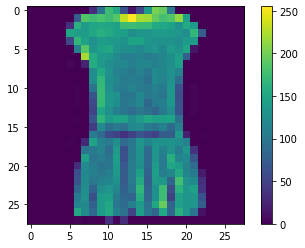

In [3]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
#Normalize pixel values
train_images=train_images/255
test_images=test_images/255

#Define a model
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])
model.summary() 
#the number of parameter  
## dense layer (784->128 784x128 weights+ 128 biases=100480)
## dense laeyr 1 (128->10 128x10+10=1290) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
#compile ->configures the model for training
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#fit-> training
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.5208 - accuracy: 0.8179
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3883 - accuracy: 0.8616
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3500 - accuracy: 0.8737
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3247 - accuracy: 0.8825
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3051 - accuracy: 0.8895


In [6]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('Test Accuracy : %.3f'%test_acc)

313/313 - 1s - loss: 0.3453 - accuracy: 0.8771 - 526ms/epoch - 2ms/step
Test Accuracy : 0.877


In [7]:
predictions=model.predict(test_images)
print(predictions[0],np.argmax(predictions[0]))
class_names[np.argmax(predictions[0])]

[1.5279282e-05 1.4943852e-07 2.3056257e-06 6.1362533e-07 3.9438532e-06
 2.4725020e-02 6.1573752e-05 5.2116666e-02 1.4520544e-04 9.2292923e-01] 9


'Ankle boot'

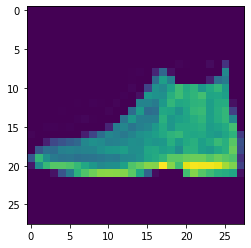

In [8]:
plt.figure()
plt.imshow(test_images[0])
plt.show()

### Basics

In [9]:
print(tf.version)
#Creating Tensors
#shape and datatype (float32, int32, string, etc)
#Scalar
string=tf.Variable('Hello',tf.string)
number=tf.Variable(23469,tf.int16)
floating=tf.Variable(3.44423,tf.float64)

#rank- degree, the number of dimensions in the tensor
# zero -> scalar
rank1_tensor=tf.Variable(['Test','Train'],tf.string)
rank2_tensor=tf.Variable([['A','Thor'],['B','Loki']],tf.string)
print(rank2_tensor.shape)
tf.rank(rank2_tensor)   #numpy=x x is the rank

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>
(2, 2)


<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [10]:
#Changing shape 
tensor1=tf.ones([1,2,3]) # shape 1,2,3 with full of ones
print(tensor1)
tensor2=tf.reshape(tensor1,[2,3,1])
print(tensor2)
tensor3=tf.reshape(tensor2,[3,-1]) #-1: calculate the size
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [ ]:
#Types of tensors (v1)
#Variable / Constant / Placeholder / SparseTensor
#Except Variable, the values in the tensors are not changed during execution


In [42]:
#From here, I set GPU available
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12871208803716708500
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11003382835900071862
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [43]:
#Setting the GPU environment
#Check available devices 
physical_devices=tf.config.list_physical_devices('GPU') #Not experimental in v.2.8.0
print(physical_devices) #Here there is no GPU 
physical_devices_CPU=tf.config.list_physical_devices('CPU')
print(physical_devices_CPU)

#check if tensorflow is built properly with cuda
print('CUDA:',tf.test.is_built_with_cuda())

#Set log available for placement of each operation to devices
#tf.debugging.set_log_device_placement(True)
a=tf.constant([[1,2],[43,27],[-4,0.7]])
b=tf.constant([[4.52],[2.89]])
c=tf.matmul(a,b)
print(c)
#In the GSDS server, following log appeared
#2022-04-28 13:12:23.878255: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
#2022-04-28 13:12:24.314741: I tensorflow/core/common_runtime/eager/execute.cc:760] Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0

#Execute on specific device
with tf.device('/GPU:0'):  # or physical_devices[0].name
  a=tf.constant([[1,2],[43,27],[-4,0.7]])
  b=tf.constant([[-5.2],[2.19]])
  c=tf.matmul(a,b)
  print(c)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
CUDA: True
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[ 10.3  ]
 [272.39 ]
 [-16.057]], shape=(3, 1), dtype=float32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[  -0.8199997]
 [-164.46999  ]
 [  22.333    ]], shape=(3, 1), dtype=float32)


In [44]:
#Limiting memory use in GPU
#since tf makes almost all memory of every GPU available to process, 
#we need to limit the usage 

#TF allocate memory and place operations only on the visible devices,
#otherwise, no logical device will be created on them (logical device may correspond to physical device or remove device in clusters)
if physical_devices:
  try:
    tf.config.set_visible_devices(physical_devices[0],'GPU')
  except RuntimeError as e:
    print(e)

#Setting memeory limit to 1GB for the first GPU

#1 set memory growth -> platform dependent->allocate necessary memory
#for runtime
if physical_devices:
  try:
    tf.config.experimental.set_memory_growth(physical_devices[0],True)
  except RuntimeError as e:
    print(e)

#2 using virtual GPU
'''
if physical_devices:
  try:
    tf.config.experimental.set_virtual_device_configuration(physical_devices[0],
                                               [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
  except RuntimeError as e:
    print(e) 
'''
'''
#After setting the memory limit, if you want, 2 logical devices can be set on a single physical device
tf.config.set_logical_device_configuration(physical_devices[0],[tf.config.LogicalDeviceConfiguration(),tf.config.LogicalDeviceConfiguration()])
logical_devices=tf.config.list_logical_devices('CPU')
'''

Physical devices cannot be modified after being initialized


"\n#After setting the memory limit, if you want, 2 logical devices can be set on a single physical device\ntf.config.set_logical_device_configuration(physical_devices[0],[tf.config.LogicalDeviceConfiguration(),tf.config.LogicalDeviceConfiguration()])\nlogical_devices=tf.config.list_logical_devices('CPU')\n"

In [45]:
#op placed on CPU if 1) no gpu implementation for the op
#2) no GPU available
tf.config.set_soft_device_placement(True)

#Multi gpu
strategy=tf.distribute.MirroredStrategy()
with strategy.scope():
  inputs=tf.keras.layers.Input(shape=(1,))
  predictions=tf.keras.layers.Dense(1)(inputs)
  model2=tf.keras.models.Model(inputs=inputs,outputs=predictions)
  model2.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device 

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [47]:
model2=Sequential([
                  Dense(units=16,input_shape=(1,),activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=2,activation='softmax')
                  ])
model2.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:

In [48]:
model2.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [49]:
#Save and load models
model.summary()
model.save('model_saved.h5')
#save 1) architecture 2) weights 3) training configuration (loss, optimizer)
#4) state of the optimizer (where you left off)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/devic

In [50]:
from tensorflow.keras.models import load_model
new_model=load_model('model_saved.h5')
new_model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:

In [53]:
new_model.get_weights()

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0


[array([[-0.05084378,  0.01100323, -0.06292105, ..., -0.09276337,
         -0.10524768, -0.03219014],
        [-0.00867001, -0.17178985,  0.06049719, ...,  0.07626434,
         -0.08140095,  0.02846262],
        [-0.22035362, -0.05210159,  0.11749277, ...,  0.02266239,
         -0.14819758,  0.03327586],
        ...,
        [-0.22563875, -0.03553521,  0.1319465 , ...,  0.11755459,
         -0.12655132, -0.07386696],
        [-0.23116979,  0.00766882,  0.0646176 , ..., -0.07721467,
         -0.05702545, -0.09554474],
        [ 0.08346709,  0.02640171, -0.03001556, ..., -0.14405729,
         -0.11642829, -0.1461958 ]], dtype=float32),
 array([ 0.0121194 ,  0.22995497,  0.36358273,  0.10280707,  0.15356699,
         0.17079757, -0.01447484,  0.26521298, -0.02880002,  0.23884335,
         0.24146926, -0.02243288,  0.33218834, -0.01161902,  0.07191323,
         0.08302564, -0.07021653,  0.14606696,  0.3632327 , -0.01450768,
        -0.16531381,  0.01259628,  0.07247036,  0.21696062,  0.175

In [54]:
new_model.optimizer

In [55]:
#Model.to_json() when we only want to save the architecture not weights etc
json_string=model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_1_input"}}, {"class_name": "Flatten", "config": {"name": "flatten_1", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_8", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": 

In [56]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:

In [57]:
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Save only weights
model.save_weights('model_weights.h5')
new_model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])
new_model.load_weights('model_weights.h5')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in de